### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Import Data

In [2]:
ETTm1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm1.csv")
training_df, test_df = split_dataset(ETTm1, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [3]:
p_lag = 96
future_steps = 48
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]
modelling_task = 'univariate'
n_continous_features=7
n_categorial_features=5
dataset_name = 'ETTm1'

#### ETTm2

#### RLinear

Random seed set as 42
Univatiate modelling
inflation factor = 1
Rlinear activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 12.562477136611939
Current (running) training loss at iteration 10000 : 10.234788462638855
Current (running) training loss at iteration 15000 : 8.87884499422709
Current (running) training loss at iteration 20000 : 8.033502016639709
Current (running) training loss at iteration 25000 : 7.169301204471588
Current (running) training loss at iteration 30000 : 6.516479789527257
Current (running) training loss at iteration 35000 : 5.9231572885206765
Current (running) training loss at iteration 40000 : 5.366264389154315
Current (running) training loss at iteration 45000 : 4.952217029391394

Epoch 0: 

Train metrics: -------
Running (training) loss is 4.808229149756018.
Training MAE is 0.5580539927307712.
Training MSE is 4.814525922657632.

Test metrics: -------
Running (test) loss is 1.0888122733548693.
Test MAE is 0.2813527633624124.
Test MSE is 1.0904728559689316.
---------------------------
Current learning rate is : 5e-05
-----------------

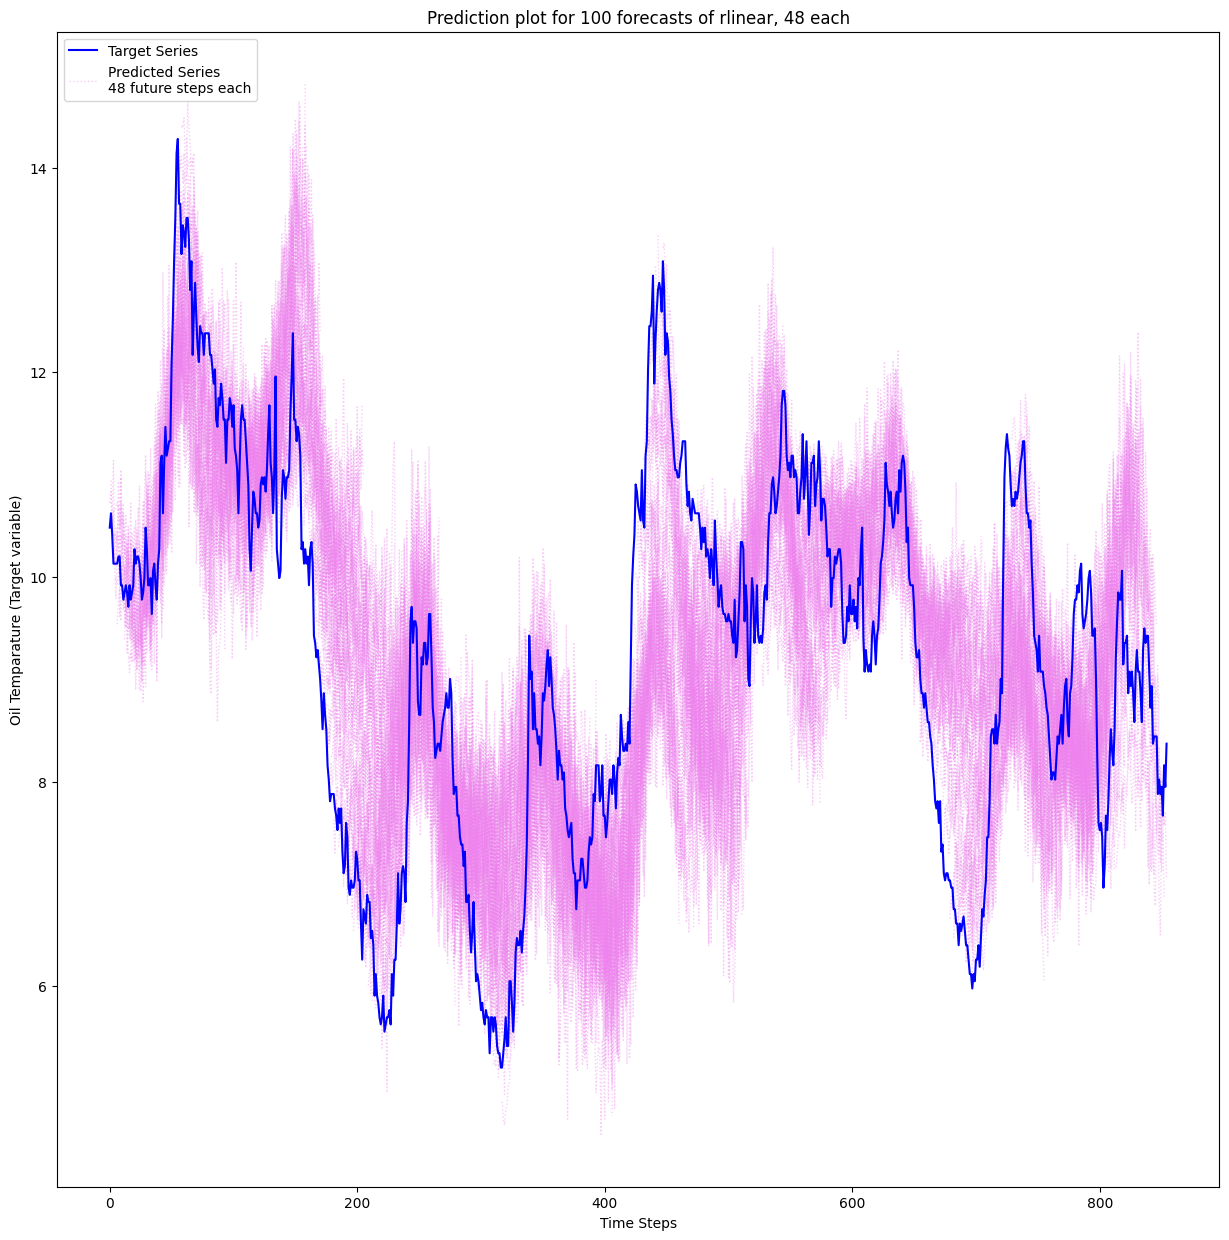

In [4]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rlinear', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

#### Dlinear

Random seed set as 42
Univatiate modelling
inflation factor = 1
Dlinear activated
Points to be estimated
With a shallow network
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 7.868385168457031
Current (running) training loss at iteration 10000 : 6.190464957237244
Current (running) training loss at iteration 15000 : 5.322214954185486
Current (running) training loss at iteration 20000 : 5.2735105180263515
Current (running) training loss at iteration 25000 : 4.8668166066741945
Current (running) training loss at iteration 30000 : 4.746152906195323
Current (running) training loss at iteration 35000 : 4.5508862930297855
Current (running) training loss at iteration 40000 : 4.377721287345886
Current (running) training loss at iteration 45000 : 4.174618730852339

Epoch 0: 

Train metrics: -------
Running (training) loss is 4.078472550732504.
Training MAE is 0.5524050421009696.
Training MSE is 4.085788312841254.

Test metrics: -------
Running (test) loss is 12.391320675213013.
Test MAE is 0.993573657984804.
Test MSE is 12.39484279336936.
---------------------------
Current learning rate is : 5e-05
------------------

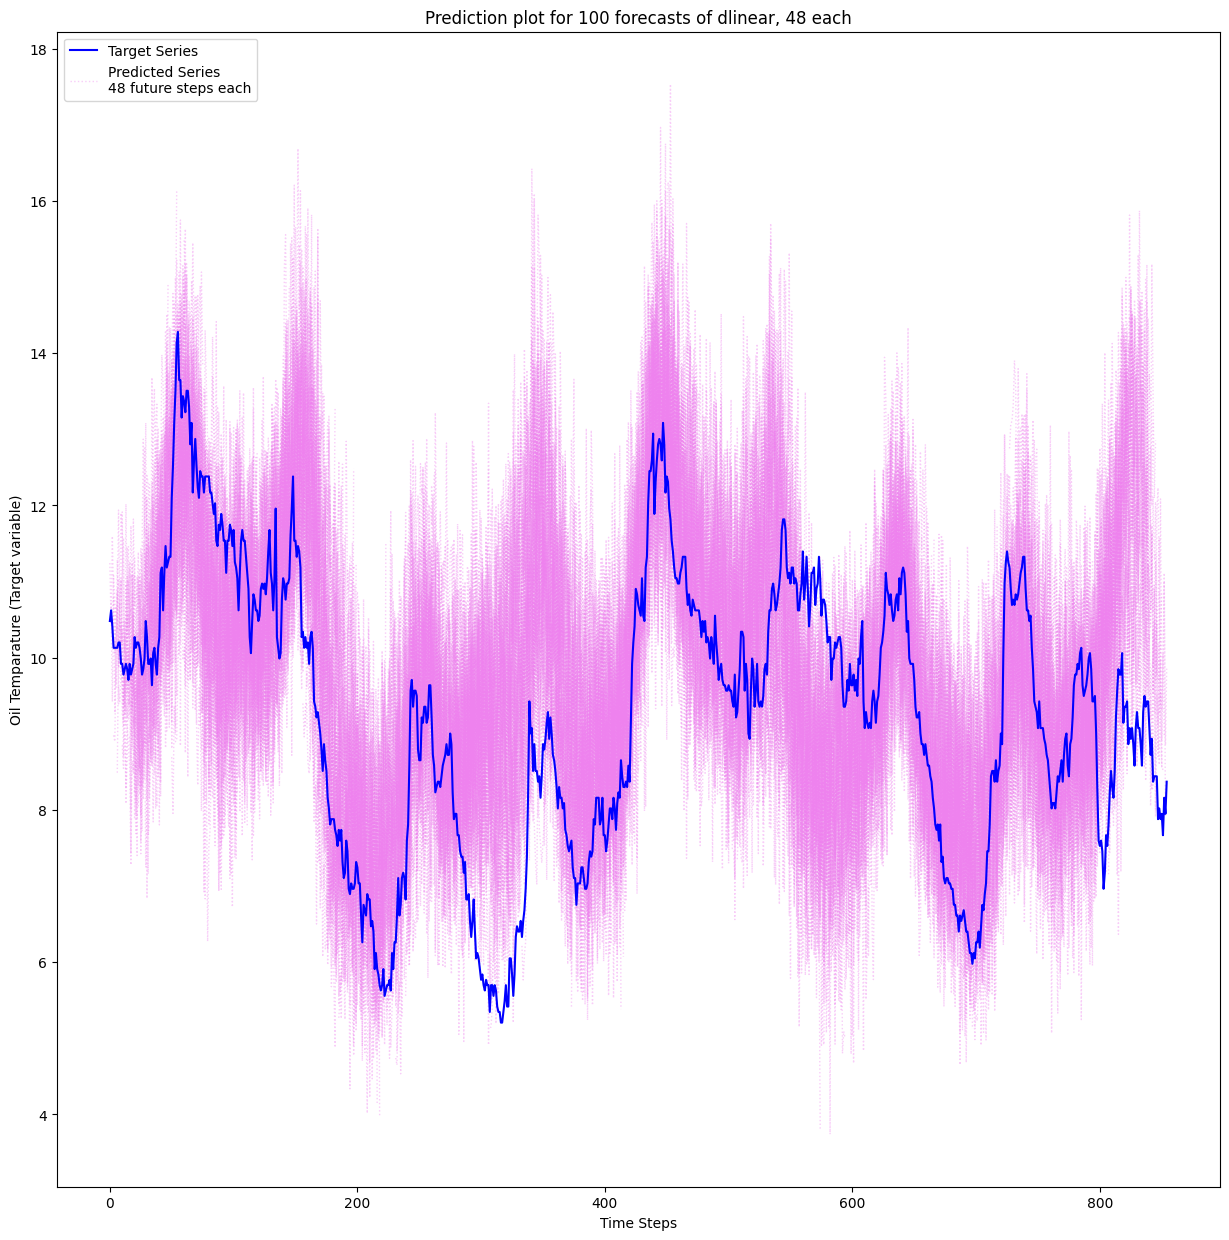

In [5]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'dlinear', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

#### RLMP

Random seed set as 42
Univatiate modelling
inflation factor = 1
RMLP activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 19.153916505813598
Current (running) training loss at iteration 10000 : 12.879569249629974
Current (running) training loss at iteration 15000 : 9.836165827624002
Current (running) training loss at iteration 20000 : 8.112823917806148
Current (running) training loss at iteration 25000 : 6.9295902729415895
Current (running) training loss at iteration 30000 : 6.301871561614672
Current (running) training loss at iteration 35000 : 5.743561536298479
Current (running) training loss at iteration 40000 : 5.192714718925953
Current (running) training loss at iteration 45000 : 4.776029596967168

Epoch 0: 

Train metrics: -------
Running (training) loss is 4.635217371969425.
Training MAE is 0.5259752704169437.
Training MSE is 4.642368710234521.

Test metrics: -------
Running (test) loss is 1.4267173264749784.
Test MAE is 0.3276657107050867.
Test MSE is 1.4282893465280029.
---------------------------
Current learning rate is : 5e-05
----------------

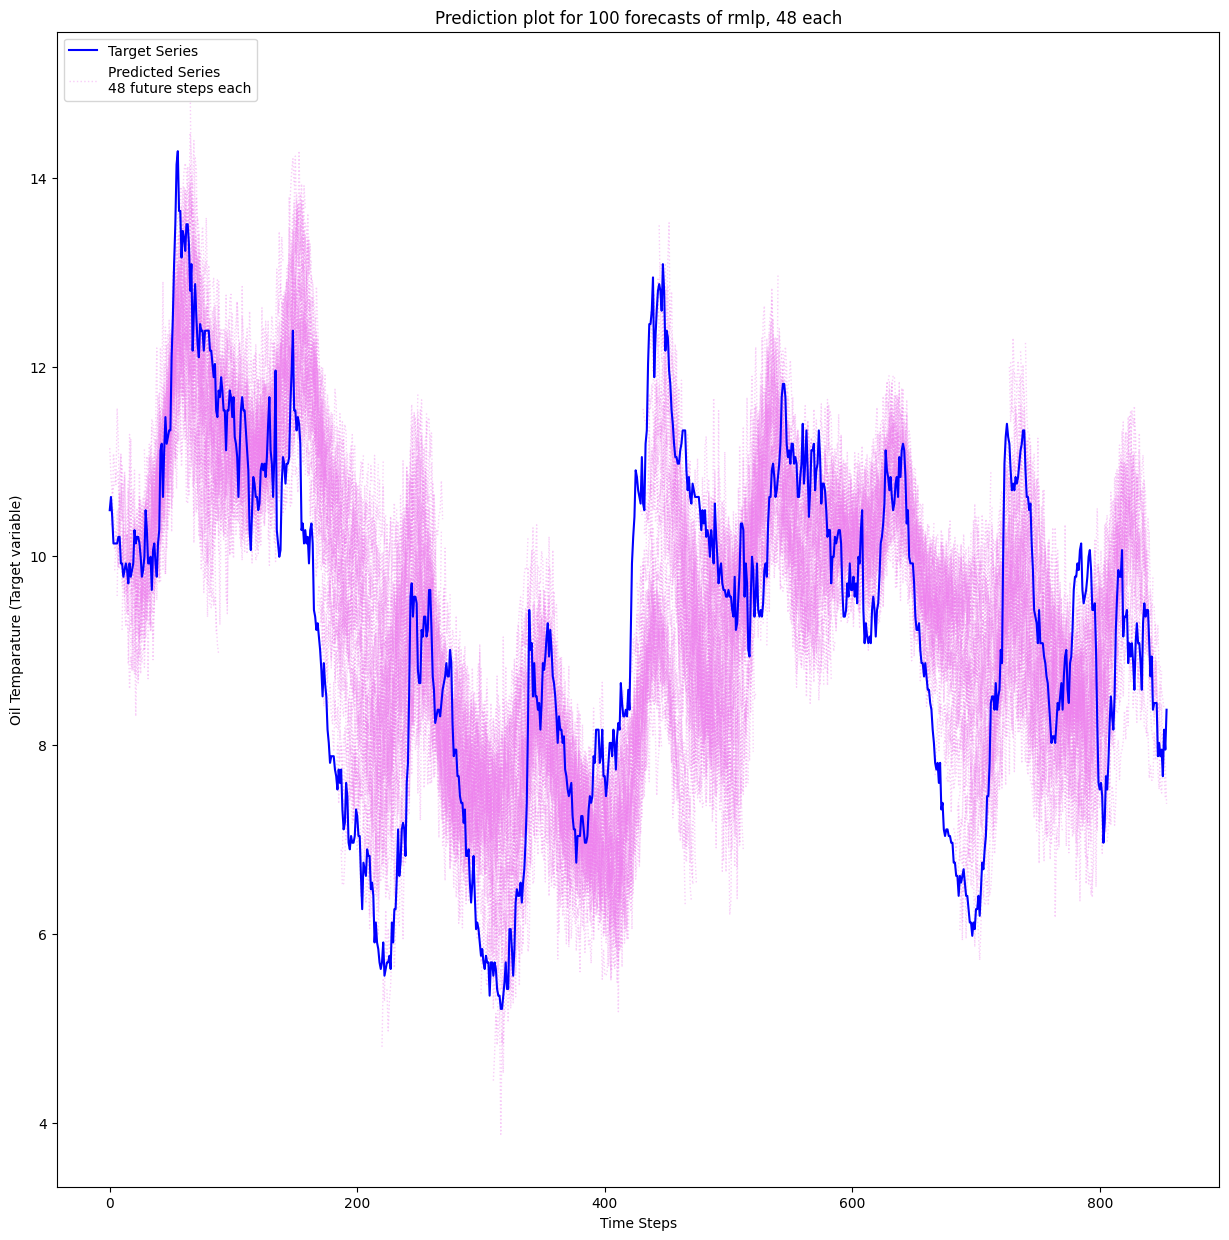

In [6]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rmlp', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)